<a href="https://colab.research.google.com/github/ife-dolapo/Neural-Network-Image-Classification/blob/main/Assignment_12_Neural_Network_and_Deep_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import all necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


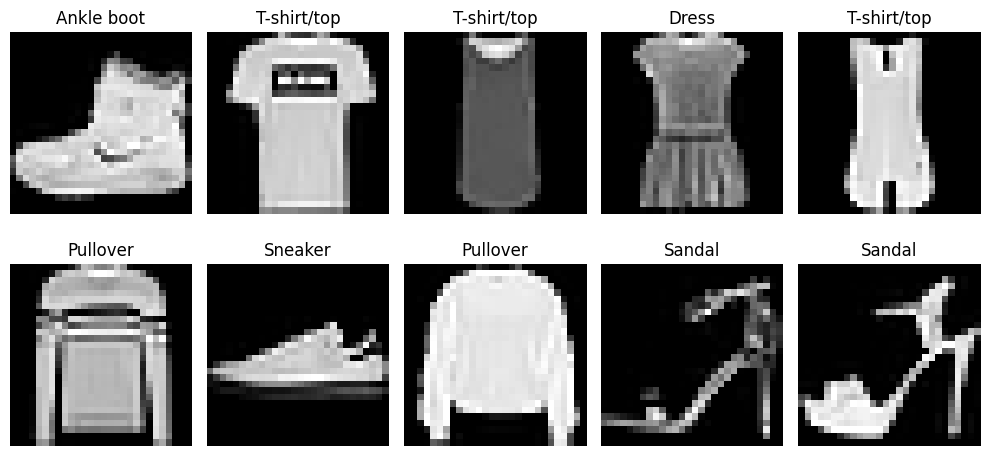

In [4]:
# Load and visualize dataset
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [5]:
# Task 2: Image Preprocessing
# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for feedforward NN (flattened input)
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [6]:
# Task 3: Neural Network Implementation
# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Training the Model
# Train with Validation Split
history = model.fit(X_train_flat, y_train_cat,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.2)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7600 - loss: 0.7017 - val_accuracy: 0.8463 - val_loss: 0.4365
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8584 - loss: 0.3932 - val_accuracy: 0.8452 - val_loss: 0.4224
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8720 - loss: 0.3521 - val_accuracy: 0.8738 - val_loss: 0.3515
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8830 - loss: 0.3237 - val_accuracy: 0.8768 - val_loss: 0.3463
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8891 - loss: 0.3020 - val_accuracy: 0.8786 - val_loss: 0.3399
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8950 - loss: 0.2840 - val_accuracy: 0.8730 - val_loss: 0.3562
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9000 - loss: 0.2677 - val_accuracy: 0.8893 - val_loss: 0.3217
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9052 - loss: 0.2602 - val_accuracy: 0.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.83      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.79      0.76      0.78      1000
       Dress       0.87      0.92      0.90      1000
        Coat       0.73      0.86      0.79      1000
      Sandal       0.99      0.93      0.96      1000
       Shirt       0.77      0.62      0.68      1000
     Sneaker       0.91      0.98      0.94      1000
         Bag       0.95      0.98      0.96      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



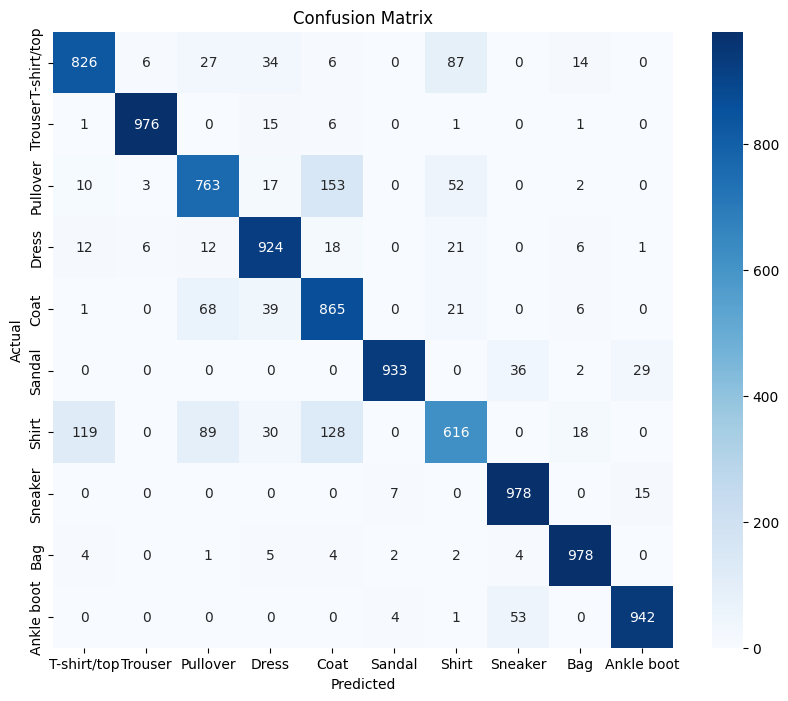

In [8]:
# Task 4: Model Evaluation
# Predict
y_pred = model.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

# Report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [9]:
# Task 4 Contd: Model Improvements
# Data Augmentation

datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Fit generator
datagen.fit(X_train.reshape(-1, 28, 28, 1))  # reshape for CNN if needed


# Task 5: Application Demonstration
**Practical Deployment Scenario**

A hypothetical application of the trained image classification model is in a fashion retail platform. Customers could upload photos of clothing items—such as shoes, coats, or shirts—and the model would automatically classify them into predefined categories. This enables features like auto-tagging for inventory, personalized product recommendations, and improved search functionality. Retailers could also use the model to organize large image databases or streamline product uploads from suppliers.

**Operational Challenges**

- **Model Scalability:**

To support thousands of daily users, the model must scale efficiently. This requires deploying it on cloud platforms with autoscaling capabilities and possibly converting it to a lightweight format (e.g., TensorFlow Lite) for mobile or edge devices.

- **Real-Time Processing Needs:**

Users expect instant feedback when uploading images. To meet this demand, the model should be optimized for fast inference and deployed with GPU acceleration or edge computing to reduce latency.

- **Integration with Existing Technology:**

The model must integrate smoothly with existing systems such as product databases, search engines, and user interfaces. This involves wrapping the model in an API (e.g., using Flask or FastAPI), ensuring consistent preprocessing between training and production, and possibly using message queues for asynchronous processing.



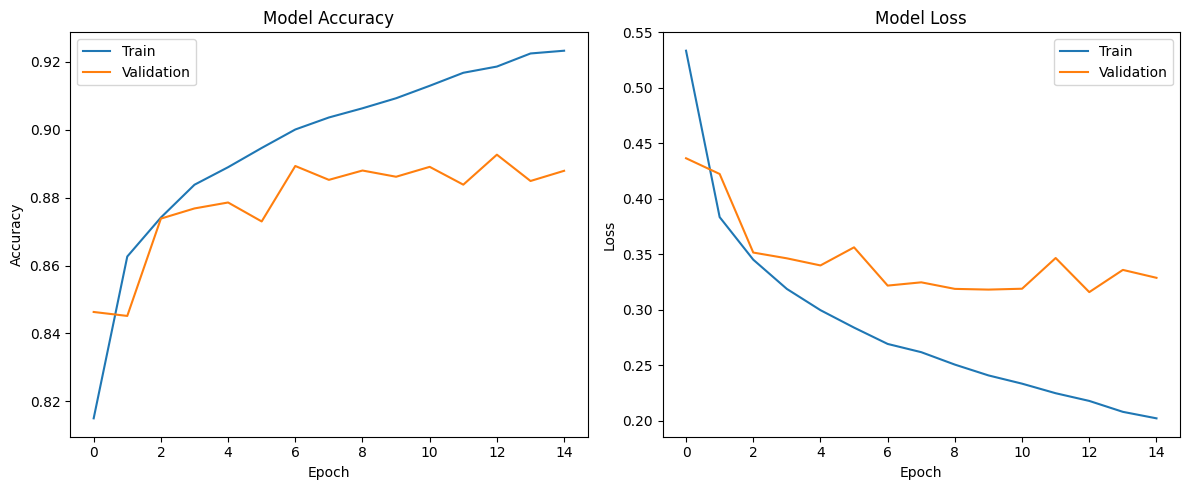

In [10]:
# Visualization for Result Analysis
# Accuracy and Loss plots
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()